In [1]:
import pandas as pd
from collections import Counter
import os

In [2]:
df = pd.read_csv('merged_Friday.csv')

In [3]:
# Divide each value in the 'Fwd Packet Length Mean' column by the corresponding value in the 'Total Fwd Packets' column
df['Fwd Packets Normalized'] = (df[' Fwd Packet Length Mean'] / df[' Total Fwd Packets']).round(3)

df['Bwd Packets Normalized'] = (df[' Bwd Packet Length Mean'] / df[' Total Backward Packets']).round(3)

In [4]:
import numpy as np
# Define ranges for categorization
category_ranges = {
    'Fwd_low': (0, 1000.00),
    'Fwd_medium': (1001.00, 2000.00),
    'Fwd_high': (2001.00, 3000.00),
    'Fwd_very_high': (3001.00, np.inf)
}

# Function to categorize values based on ranges
def categorize_value(value, ranges):
    if pd.isnull(value):
        return 'fwd_low'  # Treat NaN values as 'low'
    for category, (lower, upper) in ranges.items():
        if lower <= value <= upper:
            return category
    return 'unknown'

# Apply categorization to 'Fwd Packets Normalized' column
df['Fwd Packets Category'] = df['Fwd Packets Normalized'].apply(lambda x: categorize_value(x, category_ranges))

In [5]:
import numpy as np
# Define ranges for categorization
category_ranges = {
    'Bwd_low': (0, 1000.00),
    'Bwd_medium': (1001.00, 2000.00),
    'Bwd_high': (2001.00, 3000.00),
    'Bwd_very_high': (3001.00, np.inf)
}

# Function to categorize values based on ranges
def categorize_value(value, ranges):
    if pd.isnull(value):
        return 'Bwd_low'  # Treat NaN values as 'low'
    for category, (lower, upper) in ranges.items():
        if lower <= value <= upper:
            return category
    return 'unknown'

# Apply categorization to 'Bwd Packets Normalized' column
df['Bwd Packets Category'] = df['Bwd Packets Normalized'].apply(lambda x: categorize_value(x, category_ranges))

In [6]:
# Find the maximum value in a column
maximum_value = df[' Flow Duration'].max()

# Find the minimum value in a column
minimum_value = df[' Flow Duration'].min()

# Print the maximum and minimum values
print("Maximum Value:", maximum_value)
print("Minimum Value:", minimum_value)

Maximum Value: 119999993
Minimum Value: -13


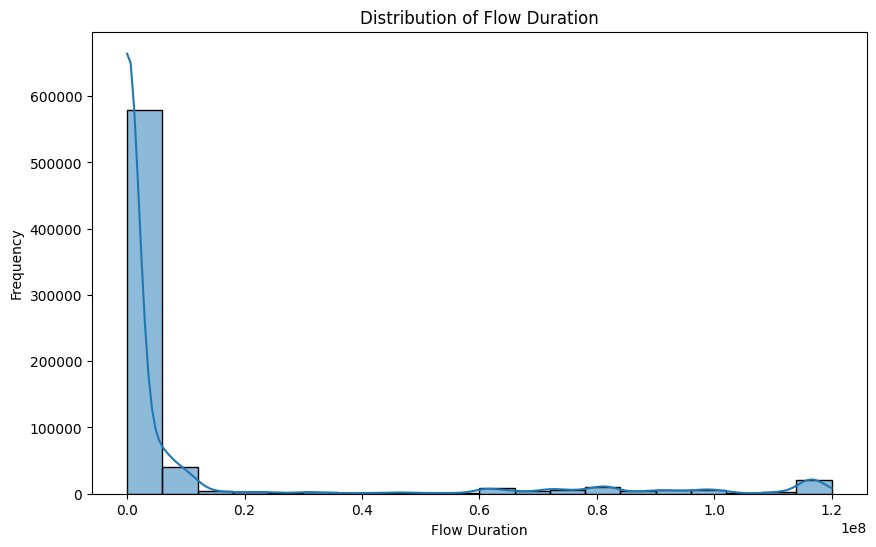

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define the number of bins (ranges) for the histogram
num_bins = 20  # You can adjust this based on your preference

# Create a histogram
plt.figure(figsize=(10, 6))
sns.histplot(df[' Flow Duration'], bins=num_bins, kde=True)
plt.title('Distribution of Flow Duration')
plt.xlabel('Flow Duration')
plt.ylabel('Frequency')

# Show plot
plt.show()

In [8]:
import numpy as np

# Define bin edges starting from 0
bin_edges = np.linspace(0, df[' Flow Duration'].max(), num_bins + 1)

# Discretize 'Flow Duration' into bins
df['Flow Duration Bin'] = pd.cut(df[' Flow Duration'], bins=bin_edges)

# Count occurrences of each label within each bin
label_counts_per_bin = df.groupby('Flow Duration Bin')[' Label'].value_counts().unstack(fill_value=0)

# Print the counts
print(label_counts_per_bin)

 Label                       BENIGN   Bot   DDoS  PortScan
Flow Duration Bin                                         
(0.0, 5999999.65]            336871  1954  80841    158487
(5999999.65, 11999999.3]      16466     0  24262        67
(11999999.3, 17999998.95]      3504     0    938         1
(17999998.95, 23999998.6]      2022     0    347        71
(23999998.6, 29999998.25]      1237     0    138         1
(29999998.25, 35999997.9]      2199     0     13         1
(35999997.9, 41999997.55]       978     0      0        59
(41999997.55, 47999997.2]      1723     0     14         0
(47999997.2, 53999996.85]      1062     0      0         0
(53999996.85, 59999996.5]       935     0     14        47
(59999996.5, 65999996.15]      7978     2      0         0
(65999996.15, 71999995.8]      2901     0   1570         0
(71999995.8, 77999995.45]      2561     0   3366        29
(77999995.45, 83999995.1]      3507     0   7230         0
(83999995.1, 89999994.75]      1444     0   2057        

In [9]:
# Define bin edges starting from 0
bin_edges = np.linspace(0, 5999995.1, num_bins + 1)

# Discretize 'Flow Duration' into bins
df['Flow Duration Bin'] = pd.cut(df[' Flow Duration'], bins=bin_edges)

# Count occurrences of each label within each bin
label_counts_per_bin = df.groupby('Flow Duration Bin')[' Label'].value_counts().unstack(fill_value=0)

# Print the counts
print(label_counts_per_bin)

 Label                     BENIGN   Bot   DDoS  PortScan
Flow Duration Bin                                       
(0.0, 299999.755]          285027  1453  23857    158457
(299999.755, 599999.51]      8422    10   7863        14
(599999.51, 899999.265]      4010     1   9607         3
(899999.265, 1199999.02]     3903   490   6931         0
(1199999.02, 1499998.775]    2614     0   6646         0
(1499998.775, 1799998.53]    1540     0   5473         0
(1799998.53, 2099998.285]    2055     0   6055         1
(2099998.285, 2399998.04]     856     0   1080         0
(2399998.04, 2699997.795]     688     0    735         0
(2699997.795, 2999997.55]     713     0    736         0
(2999997.55, 3299997.305]    1081     0   1056         1
(3299997.305, 3599997.06]    1089     0    942         3
(3599997.06, 3899996.815]    1031     0   1091         0
(3899996.815, 4199996.57]    2046     0   2873         0
(4199996.57, 4499996.325]    1227     0    643         0
(4499996.325, 4799996.08]     8

In [10]:
# Define bin edges starting from 0
bin_edges = np.linspace(0, 299999.755, num_bins + 1)

# Discretize 'Flow Duration' into bins
df['Flow Duration Bin'] = pd.cut(df[' Flow Duration'], bins=bin_edges)

# Count occurrences of each label within each bin
label_counts_per_bin = df.groupby('Flow Duration Bin')[' Label'].value_counts().unstack(fill_value=0)

# Print the counts
print(label_counts_per_bin)

 Label                    BENIGN  Bot  DDoS  PortScan
Flow Duration Bin                                    
(0.0, 14999.988]          156910  726   636    158417
(14999.988, 29999.976]     24570    0  3576        31
(29999.976, 44999.963]     23632    0  4603         0
(44999.963, 59999.951]     23700   19  2690         0
(59999.951, 74999.939]     17818  339  1978         0
(74999.939, 89999.926]      6852  164  1389         1
(89999.926, 104999.914]     6629   72  1176         3
(104999.914, 119999.902]    3643   23  1222         2
(119999.902, 134999.89]     3737   24   828         0
(134999.89, 149999.878]     2933    7   774         0
(149999.878, 164999.865]    2326    8   740         0
(164999.865, 179999.853]    2082    4   690         0
(179999.853, 194999.841]    2087    5   603         0
(194999.841, 209999.828]    1937   20   519         1
(209999.828, 224999.816]    1427   23   412         0
(224999.816, 239999.804]    1189    7   369         1
(239999.804, 254999.792]    

In [11]:
# Define bin edges starting from 0
bin_edges = np.linspace(14999.988, 89999.926, num_bins + 1)

# Discretize 'Flow Duration' into bins
df['Flow Duration Bin'] = pd.cut(df[' Flow Duration'], bins=bin_edges)

# Count occurrences of each label within each bin
label_counts_per_bin = df.groupby('Flow Duration Bin')[' Label'].value_counts().unstack(fill_value=0)

# Print the counts
print(label_counts_per_bin)

 Label                  BENIGN  Bot  DDoS  PortScan
Flow Duration Bin                                  
(14999.988, 18749.985]    2346    0   651         2
(18749.985, 22499.982]    1230    0   854        26
(22499.982, 26249.979]   19461    0   964         1
(26249.979, 29999.976]    1533    0  1107         2
(29999.976, 33749.972]   19399    0  1256         0
(33749.972, 37499.969]    2073    0  1218         0
(37499.969, 41249.966]    1272    0  1178         0
(41249.966, 44999.963]     888    0   951         0
(44999.963, 48749.96]    11907    0   806         0
(48749.96, 52499.957]     8121    1   752         0
(52499.957, 56249.954]    1647    2   602         0
(56249.954, 59999.951]    2025   16   530         0
(59999.951, 63749.948]   11109   60   643         0
(63749.948, 67499.945]    2292  102   512         0
(67499.945, 71249.942]    2290   80   453         0
(71249.942, 74999.938]    2127   97   370         0
(74999.938, 78749.935]    2230   49   410         0
(78749.935, 

In [12]:
# Define bin edges starting from 0
bin_edges = np.linspace(0, 14999.988, num_bins + 1)

# Discretize 'Flow Duration' into bins
df['Flow Duration Bin'] = pd.cut(df[' Flow Duration'], bins=bin_edges)

# Count occurrences of each label within each bin
label_counts_per_bin = df.groupby('Flow Duration Bin')[' Label'].value_counts().unstack(fill_value=0)

# Print the counts
print(label_counts_per_bin)

 Label                  BENIGN  Bot  DDoS  PortScan
Flow Duration Bin                                  
(0.0, 749.999]          145794  726   118    157978
(749.999, 1499.999]       4061    0     6       304
(1499.999, 2249.998]       992    0    17        19
(2249.998, 2999.998]       648    0     2        38
(2999.998, 3749.997]       558    0     7         1
(3749.997, 4499.996]       590    0     9        11
(4499.996, 5249.996]       502    0     5         0
(5249.996, 5999.995]       365    0     3         1
(5999.995, 6749.995]       346    0    13        16
(6749.995, 7499.994]       332    0    11         7
(7499.994, 8249.993]       289    0    15         0
(8249.993, 8999.993]       374    0    19         4
(8999.993, 9749.992]       299    0    39         2
(9749.992, 10499.992]      303    0    38         9
(10499.992, 11249.991]     237    0    43         6
(11249.991, 11999.99]      340    0    41         2
(11999.99, 12749.99]       238    0    64         6
(12749.99, 1

In [13]:
# Define bin edges starting from 0
bin_edges = np.linspace(0, 749.999, num_bins + 1)

# Discretize 'Flow Duration' into bins
df['Flow Duration Bin'] = pd.cut(df[' Flow Duration'], bins=bin_edges)

# Count occurrences of each label within each bin
label_counts_per_bin = df.groupby('Flow Duration Bin')[' Label'].value_counts().unstack(fill_value=0)

# Print the counts
print(label_counts_per_bin)

 Label              BENIGN  Bot  DDoS  PortScan
Flow Duration Bin                              
(0.0, 37.5]          28815  363    42     33091
(37.5, 75.0]         18235  280    39    106912
(75.0, 112.5]         9462   71    14     16392
(112.5, 150.0]        8177   10    11       694
(150.0, 187.5]       26654    2     6       138
(187.5, 225.0]       23046    0     2        37
(225.0, 262.5]       13578    0     2        10
(262.5, 300.0]        5453    0     1         6
(300.0, 337.5]        3086    0     0         6
(337.5, 375.0]        1703    0     1         7
(375.0, 412.499]      1249    0     0        20
(412.499, 449.999]    1233    0     0        37
(449.999, 487.499]    1279    0     0        63
(487.499, 524.999]    1029    0     0        69
(524.999, 562.499]     773    0     0        84
(562.499, 599.999]     501    0     0        97
(599.999, 637.499]     418    0     0        90
(637.499, 674.999]     350    0     0        76
(674.999, 712.499]     360    0     0   

In [14]:
# Define bin edges starting from 0
bin_edges = np.linspace(37.5, 75.0, num_bins + 1)

# Discretize 'Flow Duration' into bins
df['Flow Duration Bin'] = pd.cut(df[' Flow Duration'], bins=bin_edges)

# Count occurrences of each label within each bin
label_counts_per_bin = df.groupby('Flow Duration Bin')[' Label'].value_counts().unstack(fill_value=0)

# Print the counts
print(label_counts_per_bin)

 Label             BENIGN  Bot  DDoS  PortScan
Flow Duration Bin                             
(37.5, 39.375]        565   25     0      2628
(39.375, 41.25]       584   34     1      3868
(41.25, 43.125]       697   23     0     18386
(43.125, 45.0]        738   12     3     16767
(45.0, 46.875]        432    9     0      2822
(46.875, 48.75]      1938   42     4      7605
(48.75, 50.625]      1974   39     3     10472
(50.625, 52.5]       1344   17     1      3798
(52.5, 54.375]       1435   15     3      5912
(54.375, 56.25]      1181    5     4      5287
(56.25, 58.125]      1039    1     4      3554
(58.125, 60.0]        879    4     4      3625
(60.0, 61.875]        486    4     2      1856
(61.875, 63.75]       887    9     0      4373
(63.75, 65.625]       868   14     4      3239
(65.625, 67.5]        879    6     5      2467
(67.5, 69.375]        678    3     0      2506
(69.375, 71.25]       639    8     1      2643
(71.25, 73.125]       649    8     0      3123
(73.125, 75.0

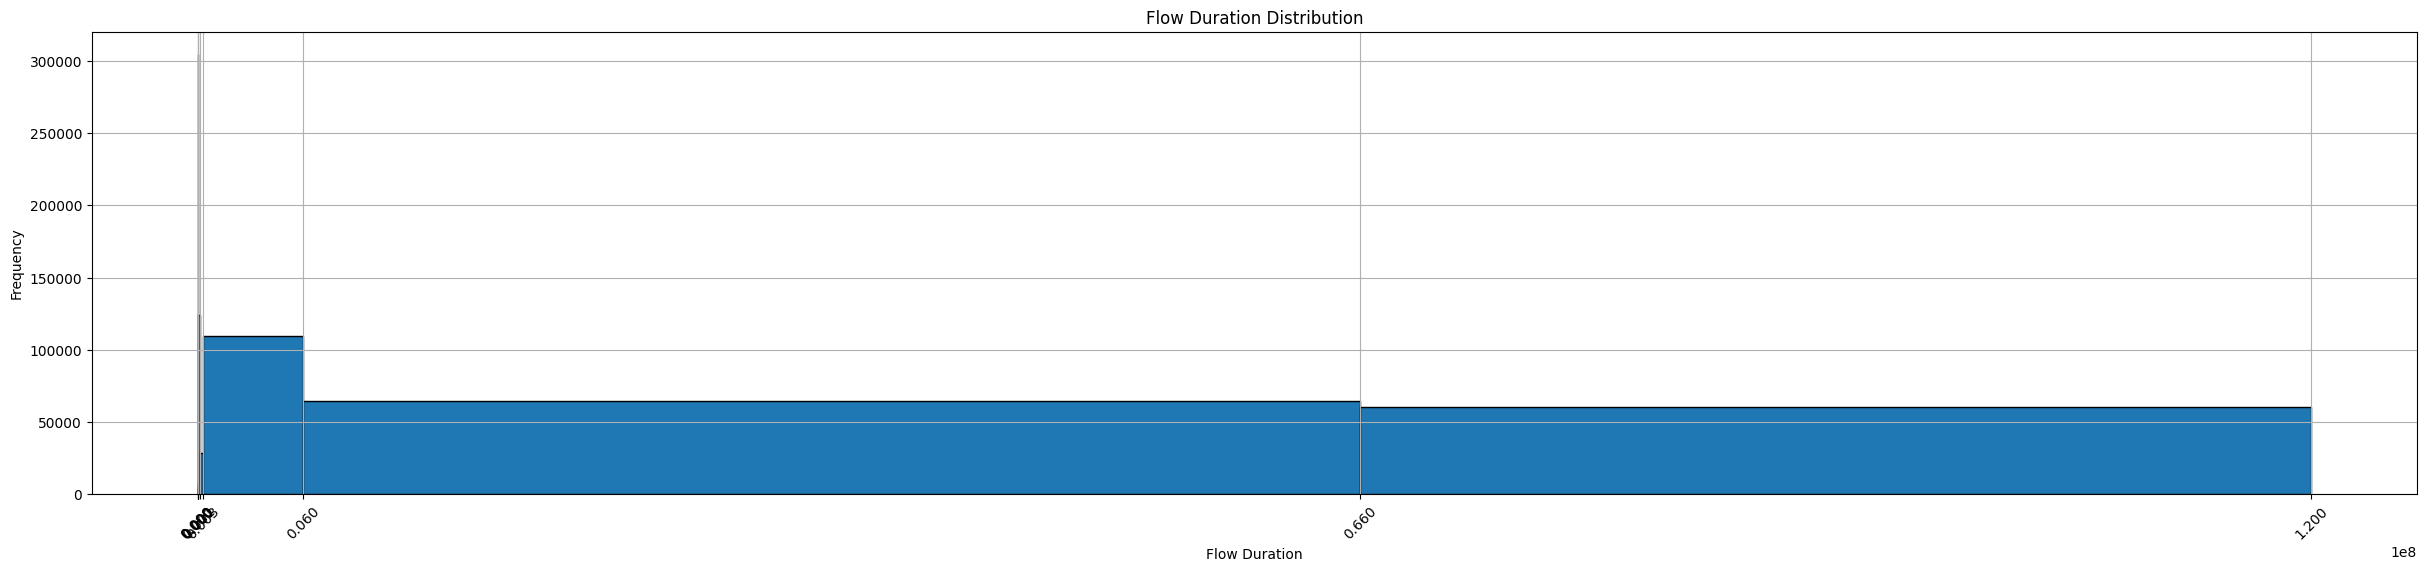

In [15]:
# Define the bins
bins = [0, 750, 1500, 15000, 120000, 300000, 6000000, 66000000, 120000000]

# Plot the histogram
plt.figure(figsize=(30, 6))
plt.hist(df[' Flow Duration'], bins=bins, edgecolor='black')
plt.xlabel('Flow Duration')
plt.ylabel('Frequency')
plt.title('Flow Duration Distribution')
plt.xticks(bins, rotation=45)
plt.grid(True)
plt.show()

In [16]:
import numpy as np
# Define ranges for categorization
ranges = {
    '0_750': (0.0, 750.0),
    '751_1500': (750.0, 1500.0),
    '1501_15000': (1500.0, 15000.0),
    '15001_120000': (15000.0, 120000.0),
    '120001_300000': (120000.0, 300000.0),
    '300001_6000000': (300000.0, 6000000.0),
    '6000001_65999946': (6000000.0, 65999946.0),
    '66000000_119999902': (65999946.0, 119999902.0),
    '119999902_infinity': (119999902.0, np.inf)
}

# Function to categorize values based on ranges
def categorize_value(value, ranges):
    if pd.isnull(value):
        return 'unknown'  # Treat NaN values as 'unknown'
    for category, (lower, upper) in ranges.items():
        if lower <= value <= upper:
            return category
    return 'unknown'

# Apply categorization to 'Flow Duration' column
df['Flow Duration Category'] = df[' Flow Duration'].apply(lambda x: categorize_value(x, ranges))



In [17]:
essential_columns = [' Source IP', ' Destination IP',' Destination Port', ' Protocol', 'Fwd Packets Category', 'Bwd Packets Category', 'Flow Duration Category']

In [18]:
# Drop non-essential columns
filtered_df = df[essential_columns]
print("\nFiltered dataset Summery")
print(filtered_df.info())


Filtered dataset Summery
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 703245 entries, 0 to 703244
Data columns (total 7 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0    Source IP              703245 non-null  object
 1    Destination IP         703245 non-null  object
 2    Destination Port       703245 non-null  int64 
 3    Protocol               703245 non-null  int64 
 4   Fwd Packets Category    703245 non-null  object
 5   Bwd Packets Category    703245 non-null  object
 6   Flow Duration Category  703245 non-null  object
dtypes: int64(2), object(5)
memory usage: 37.6+ MB
None


In [19]:
# Convert first five columns to strings and concatenate with hyphens
filtered_df['FlowID'] = filtered_df.iloc[:, :2].astype(str).apply('-'.join, axis=1)

# Drop the original columns
filtered_df = filtered_df.drop(columns=[' Source IP', ' Destination IP']) # , ' Source Port'

# Display the DataFrame
filtered_df.head()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_8600\571974056.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['FlowID'] = filtered_df.iloc[:, :2].astype(str).apply('-'.join, axis=1)


,Destination Port,Protocol,Fwd Packets Category,Bwd Packets Category,Flow Duration Category,FlowID
0,54865,6,Fwd_low,Bwd_low,0_750,104.16.207.165-192.168.10.5
1,55054,6,Fwd_low,Bwd_low,0_750,104.16.28.216-192.168.10.5
2,55055,6,Fwd_low,Bwd_low,0_750,104.16.28.216-192.168.10.5
3,46236,6,Fwd_low,Bwd_low,0_750,104.17.241.25-192.168.10.16
4,54863,6,Fwd_low,Bwd_low,0_750,104.19.196.102-192.168.10.5


In [20]:
with_ID = filtered_df.copy()
with_ID.insert(0, 'alertID', range(len(with_ID)))
print("\nAdding a ID number for the records")
print(with_ID.head())

dataset_with_ID = with_ID.values.tolist() 


Adding a ID number for the records
   alertID   Destination Port   Protocol Fwd Packets Category  \
0        0              54865          6              Fwd_low   
1        1              55054          6              Fwd_low   
2        2              55055          6              Fwd_low   
3        3              46236          6              Fwd_low   
4        4              54863          6              Fwd_low   

  Bwd Packets Category Flow Duration Category                       FlowID  
0              Bwd_low                  0_750  104.16.207.165-192.168.10.5  
1              Bwd_low                  0_750   104.16.28.216-192.168.10.5  
2              Bwd_low                  0_750   104.16.28.216-192.168.10.5  
3              Bwd_low                  0_750  104.17.241.25-192.168.10.16  
4              Bwd_low                  0_750  104.19.196.102-192.168.10.5  


In [21]:
print("\nconverting the dataset in to a list")
dataset = [alert[1:] for alert in dataset_with_ID]


converting the dataset in to a list


In [22]:
# Convert each sublist to a tuple for hashability
data_tuples = [tuple(sublist) for sublist in dataset]

# Count occurrences of each unique record
record_counts = Counter(data_tuples)

print("\nnumber occurrences of each unique record")
print(f"{len(record_counts) }")


number occurrences of each unique record
133167


In [23]:
import pandas as pd

# Assuming 'filtered_df' is your DataFrame with categorical values

# Initialize dictionaries to store both forward and reverse mappings
forward_mapping = {}
reverse_mapping = {}

# Initialize the global counter to keep track of numerical values
global_counter = 0

# Iterate over each column in the DataFrame
for column in filtered_df.columns:
    # Initialize a local counter for each column
    local_counter = 0
    
    # Initialize dictionaries for forward and reverse mappings for the current column
    forward_mapping[column] = {}
    reverse_mapping[column] = {}
    
    # Iterate over each unique value in the current column
    for value in filtered_df[column].unique():
        # Map each unique value to a numerical value based on the global counter
        forward_mapping[column][value] = global_counter + local_counter
        reverse_mapping[column][global_counter + local_counter] = value
        
        # Increment the local counter
        local_counter += 1
        
    # Update the global counter to continue numbering from the last value of the previous dictionary
    global_counter += local_counter

# Create a new DataFrame with mapped values
new_df = pd.DataFrame()

# Iterate over each column in the original DataFrame and fill in values in the new DataFrame
for column in filtered_df.columns:
    new_df[column] = filtered_df[column].map(forward_mapping[column])

# Display the DataFrame with numerical values
print(new_df)

# Display forward and reverse mappings for each column
for column in new_df.columns:
    print(f"For {column}:")
    print("Forward Mapping:", forward_mapping[column])
    print("Reverse Mapping:", reverse_mapping[column])
    print()


IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)



In [24]:
# Calculate the count of unique values in the 'type' field
type_counts = df[' Label'].value_counts()

print("\nDisplay the count of unique values in Label")
print(type_counts)


Display the count of unique values in Label
 Label
BENIGN      414322
PortScan    158930
DDoS        128027
Bot           1966
Name: count, dtype: int64


In [25]:
combined_dict = {k: v for inner_dict in reverse_mapping.values() for k, v in inner_dict.items()}

item_dataset = [tuple(x) for x in new_df.to_records(index=False)]

# Add ID field to the start of each tuple
item_dataset_withID = [(i,) + record for i, record in enumerate(item_dataset)]

new_df.to_csv('data.txt', index=False, sep=' ', header=False)

In [26]:
# Run the algorithm

os.system("java -jar spmf.jar run FPMax data.txt output.txt 0.01%")

itemset_records_object = []
itemset_records_numbers = []

# Read the output file line by line
outFile = open("output.txt", 'r', encoding='utf-8')
for string in outFile:
    itemset = []
    parts = string.split('#SUP:')
    numbers = list(map(int, parts[0].split()))
    support_count = int(parts[1].strip())

    itemset_using_numbers = [numbers, support_count]
    itemset_records_numbers.append(itemset_using_numbers)

    # Translate numerical values to attribute names using reverse mapping
    attribute_names = [str(combined_dict[num]) for num in numbers]
    itemset = [attribute_names, support_count]
    # Output the result
    #print(f"Pattern: {' '.join(attribute_names)}, Support Count: {str(support_count)}")
    itemset_records_object.append(itemset)

outFile.close()

def return_unique_labels(alertID_List):
    # Filter DataFrame based on selected IDs
    selected_records = df.iloc[alertID_List]
    # Count unique values in a certain field (e.g., Field1) in the selected records
    unique_value_counts = selected_records[' Label'].value_counts().to_dict()
    return(unique_value_counts)

patterns_ID_list = []
pattern_label_list = []

for index,record in enumerate(itemset_records_numbers):
    itemset = record[0]
    containing_alerts = []
    for alert in item_dataset_withID:
        alert_items = set(alert[1:])  # Exclude the ID field
        if set(itemset).issubset(alert_items):
            containing_alerts.append(alert[0])  # Append the ID

    pattern_label_record = list(return_unique_labels(containing_alerts).items())
    patterns_ID_list.append((itemset_records_object[index][0],containing_alerts))
    pattern_label_list.append((itemset_records_object[index][0],pattern_label_record))
    print(f"Pattern {index}: {itemset_records_object[index][0]}, \n{pattern_label_record}\n===============================================================================================================")


Pattern 0: ['Bwd_low', 'Fwd_low', '6', '443', '192.168.10.14-178.172.160.4'], 
[('BENIGN', 71)]
Pattern 1: ['Bwd_low', 'Fwd_low', '6', '80', '192.168.10.8-23.50.75.27'], 
[('BENIGN', 71)]
Pattern 2: ['Bwd_low', 'Fwd_low', '6', '23.61.187.27-192.168.10.15'], 
[('BENIGN', 71)]
Pattern 3: ['Bwd_low', 'Fwd_low', '6', '80', '192.168.10.9-23.54.187.27'], 
[('BENIGN', 71)]
Pattern 4: ['Bwd_low', 'Fwd_low', '6', '192.168.10.8-173.241.242.143'], 
[('BENIGN', 71)]
Pattern 5: ['Bwd_low', 'Fwd_low', '17', '123', '192.168.10.19-67.215.197.149'], 
[('BENIGN', 71)]
Pattern 6: ['Bwd_low', 'Fwd_low', '6', '192.168.10.16-173.241.242.143'], 
[('BENIGN', 71)]
Pattern 7: ['Bwd_low', 'Fwd_low', '6', '192.168.10.14-69.172.216.55'], 
[('BENIGN', 72)]
Pattern 8: ['Bwd_low', 'Fwd_low', '6', '192.168.10.8-172.217.10.238'], 
[('BENIGN', 72)]
Pattern 9: ['Bwd_low', 'Fwd_low', '6', '443', '192.168.10.5-68.67.178.199'], 
[('BENIGN', 73)]
Pattern 10: ['Bwd_low', 'Fwd_low', '6', '80', '192.168.10.9-72.167.239.239'], 


In [27]:
# Function to get the original field and value using the reverse mapping dictionaries
def get_field_and_value(item):
    for column, mapping in reverse_mapping.items():
        if int(item) in mapping:
            return str(column), mapping[int(item)]
    return None, None

In [28]:
# Initialize a list to store the patterns with original field and value

pattern_record = pd.DataFrame(columns=['Support Count', 'Label'])
patterns_with_fields = []

for index, record in enumerate(itemset_records_numbers):
    # Split the line into items and support count
    items = record[0]
    support_count = int(record[1])

    # Initialize a list to store the original field and value of each item
    record_with_field = []

    # Map each item in the pattern to its original field and value
    for item in items:
        # Get the field and value using the reverse mapping dictionaries
        field, value = get_field_and_value(item)
        record_with_field.append({"field": field, "value": value})

        # Check if the field already exists in the DataFrame
        if field not in pattern_record.columns:
            # If not, add a new column with the field name and fill with NaN
            pattern_record[field] = pd.NA
        
        # Add the value to the corresponding field
        pattern_record.at[index, field] = value
    
        # Add the support_count to the pattern_data dictionary
    pattern_record.at[index, 'Support Count'] = support_count

    if len(pattern_label_list[index][1]) == 1:
        pattern_record.at[index, 'Label'] = pattern_label_list[index][1][0][0]
    else:
        pattern_record.at[index, 'Label'] = 'Mixed Labels'
    # Store the pattern with original field and value along with the support count
    
    patterns_with_fields.append({"pattern": record_with_field, "support_count": support_count})

pattern_record = pattern_record.fillna('NaN').infer_objects(copy=False)

# Print the patterns with original field and value
for pattern_info in patterns_with_fields:
    print(pattern_info)
    print()


{'pattern': [{'field': 'Bwd Packets Category', 'value': 'Bwd_low'}, {'field': 'Fwd Packets Category', 'value': 'Fwd_low'}, {'field': ' Protocol', 'value': 6}, {'field': ' Destination Port', 'value': 443}, {'field': 'FlowID', 'value': '192.168.10.14-178.172.160.4'}], 'support_count': 71}

{'pattern': [{'field': 'Bwd Packets Category', 'value': 'Bwd_low'}, {'field': 'Fwd Packets Category', 'value': 'Fwd_low'}, {'field': ' Protocol', 'value': 6}, {'field': ' Destination Port', 'value': 80}, {'field': 'FlowID', 'value': '192.168.10.8-23.50.75.27'}], 'support_count': 71}

{'pattern': [{'field': 'Bwd Packets Category', 'value': 'Bwd_low'}, {'field': 'Fwd Packets Category', 'value': 'Fwd_low'}, {'field': ' Protocol', 'value': 6}, {'field': 'FlowID', 'value': '23.61.187.27-192.168.10.15'}], 'support_count': 71}

{'pattern': [{'field': 'Bwd Packets Category', 'value': 'Bwd_low'}, {'field': 'Fwd Packets Category', 'value': 'Fwd_low'}, {'field': ' Protocol', 'value': 6}, {'field': ' Destination P

In [29]:
# Save the pattern record DataFrame to a CSV file
pattern_record.to_csv('pattern_record_0.01%_NotDownSampled.csv', index=False)